In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data.csv')
df.head(10)

,Day #,Wall Street Crash,73-74 Market Crash,Black Monday,Dot Com Bubble,Financial Crisis,Corona Virus
0,Day -99,25.059999,111.660004,293.630005,1500.589966,1501.189941,3005.70
1,Day -98,25.150000,111.339996,300.410004,1467.170044,1514.140015,3006.73
2,Day -97,25.000000,111.760002,301.950012,1440.510010,1512.750000,3006.79
3,Day -96,25.059999,111.720001,296.690002,1356.560059,1522.750000,2992.07
4,Day -95,25.320000,112.410004,297.260010,1401.439941,1525.099976,2991.78
5,Day -94,25.430000,112.260002,292.859985,1441.609985,1524.119995,2966.60
6,Day -93,25.410000,111.019997,292.489990,1427.469971,1522.280029,2984.87
7,Day -92,25.700001,110.669998,285.619995,1434.540039,1507.510010,2977.62
8,Day -91,25.850000,110.230003,279.160004,1429.859985,1515.729980,2961.79
9,Day -90,25.750000,110.410004,284.440002,1477.439941,1518.109985,2976.74


In [39]:
df.shape

(6358, 7)

In [40]:
df.describe()

,Wall Street Crash,73-74 Market Crash,Black Monday,Dot Com Bubble,Financial Crisis,Corona Virus
count,6358.000000,1998.000000,581.000000,1934.000000,1476.000000,136.000000
mean,15.202342,98.195395,282.763046,1203.372063,1236.370385,3063.462794
std,5.758628,10.925522,25.997526,183.039766,200.191152,243.860732
min,4.400000,62.279999,223.919998,776.760010,676.530029,2237.400000
25%,10.740000,92.512501,263.500000,1095.412536,1102.612518,2983.342500
50%,14.400000,99.930000,278.070007,1195.940002,1277.440002,3106.000000
75%,18.020000,104.637499,304.920013,1342.080017,1389.162445,3237.862500
max,31.860001,120.239998,336.769989,1552.500000,1565.150024,3386.150000


#### Data Preprocessing

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = []
unscaled_dataset = []
for crash in list(df)[1:]:
    data = df.filter([crash])
    scaled_dataset.append(scaler.fit_transform((data.values)))
    unscaled_dataset.append(data.values)
for i in range(len(scaled_dataset)):
    scaled_dataset[i] = np.reshape(list(filter(lambda x: x==x, scaled_dataset[i])), (len(list(filter(lambda x: x==x, scaled_dataset[i]))), 1))
    unscaled_dataset[i] = np.reshape(list(filter(lambda x: x==x, unscaled_dataset[i])), (len(list(filter(lambda x: x==x, unscaled_dataset[i]))), 1))
train_data = scaled_dataset[:-1]
test_data = scaled_dataset[-1]
unscaled_test_data = unscaled_dataset[-1]
                                     
                                     
                                


#### Training and Testing

In [30]:
batch_sz = 20

x_train = []
x_test =[]
y_train = []
y_scaled_test =[]
y_unscaled_test =[]

for crash in train_data :
    for i in range(batch_sz,len(crash)):
        x_train.append(crash[i-batch_sz:i,0])
        y_train.append(crash[i,0])

for i in range(batch_sz, len(test_data)):
    x_test.append(test_data[i-batch_sz:i, 0])
    y_unscaled_test.append(unscaled_test_data[i, 0])
    y_scaled_test.append(test_data[i, 0])

In [36]:
regressor = SVR(kernel = "rbf")
regressor.fit(x_train,y_train)

y_pred= []
for k in x_test:
    y_pred.append(regressor.predict([k]))
y_pred = scaler.inverse_transform(y_pred)

x_future_test = x_test[-1][1:]
x_future_test = [np.append(x_future_test, y_scaled_test[-1])]
pred = []
for i in range(batch_sz):
    pred.append(regressor.predict([x_future_test[i]]))
    x_future_test.append(np.append(x_future_test[i][1:], pred[i]))
pred = scaler.inverse_transform(pred)

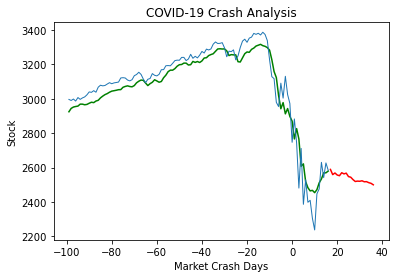

In [38]:
plt.title("COVID-19 Crash Analysis",fontsize = 12)
plt.xlabel("Market Crash Days")
plt.ylabel("Stock")
plt.plot([x for x in range(-99, len(y_pred) - 99)], y_pred, color = "Green")
plt.plot([x for x in range(-99, len(y_pred) - 99)], y_unscaled_test, linewidth=1)
plt.plot([x for x in range(len(y_pred) - 99, len(y_pred) - 99 + batch_sz)] , pred, color = "red")
plt.show()

- Blue(Actual values) 
- Green (Predicted Value on test data)
- Red (Predicted Value on train data)